# Data Modeling - Classification - Exercise #1 - Solution

### Notebook Imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In this exercise, you will work with the `heart.csv` dataset, and create classifiers for it to predict if a person has a heart disease or not.

<div class="alert alert-info">
<b><h2>Data Dictionary:</b><ul>
<li>age</li>
<li>sex</li>
<li>chest pain type (4 values)</li>
<li>resting blood pressure</li>
<li>serum cholestoral in mg/dl</li>
<li>fasting blood sugar > 120 mg/dl</li>
<li>resting electrocardiographic results (values 0,1,2)</li>
<li>maximum heart rate achieved</li>
<li>exercise induced angina</li>
<li>oldpeak = ST depression induced by exercise relative to rest</li>
<li>the slope of the peak exercise ST segment</li>
<li>number of major vessels (0-3) colored by flourosopy</li>
<li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
</ul></div>

## Questions
### 1. Load the `heart.csv` dataset into a pandas dataframe

In [4]:
# your code here
df= pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Perform minimal EDA and preprocessing steps that are mandatory in order to proceed to classification (do not go overboard)

In [5]:
# your code here

In [11]:
# Checking all the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    int64  
 1   sex       298 non-null    int64  
 2   cp        298 non-null    int64  
 3   trestbps  298 non-null    int64  
 4   chol      298 non-null    int64  
 5   fbs       298 non-null    int64  
 6   restecg   298 non-null    int64  
 7   thalach   298 non-null    int64  
 8   exang     298 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     298 non-null    int64  
 11  ca        298 non-null    int64  
 12  thal      298 non-null    int64  
 13  target    298 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.7 KB


In [16]:
# Summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.510067,0.677852,0.959732,131.580537,246.906040,0.147651,0.523490,149.466443,0.328859,1.055369,1.395973,0.674497,2.312081,0.540268
std,9.030526,0.468085,1.033963,17.669293,51.893097,0.355350,0.526521,22.983830,0.470589,1.164162,0.617574,0.938202,0.614024,0.499214
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [12]:
# Checking Missing Values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# Identifying Numerical But Categorical Features
df.select_dtypes("number").nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          4
target        2
dtype: int64

In [14]:
# By looking at the results, 9 features have abnormally low number of Unique values!
# This is indicative that these numerical values are actually Categorical values!

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

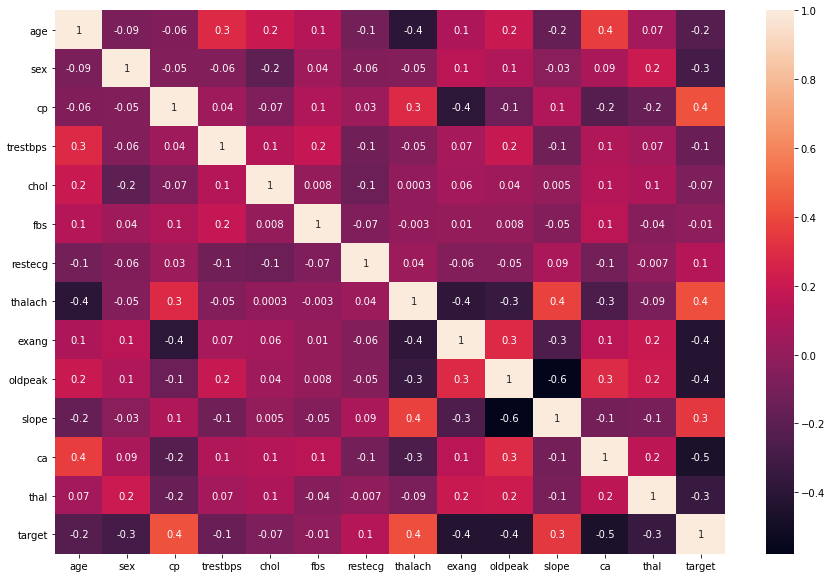

In [23]:
plt.figure(figsize= (15, 10))

correlation= df.corr()
sns.heatmap(correlation, annot=True, fmt='.1g')

### 3. Split the data into a train set and a test set, making sure the sets are stratified according to the dependent variable.

In [ ]:
# your code here

### 4. Train a model based on the Naive Bayes algorithm. Which version of the model did you choose? Why?

In [ ]:
# your code here

### 5. Report the results of the Naive Bayes algorithm on your test set, in terms of Accuracy. Also, show the confusion matrix, and explain what was the number of FP and FN of the model.

In [ ]:
# your code here

### 6. Train a model based on the Logistic Regression algorithm. 

In [ ]:
# your code here

### 7. Report the results of the Logistic Regression algorithm on your test set, in terms of Accuracy. Also, show the confusion matrix, and explain what was the number of FP and FN of the model.

In [ ]:
# your code here

### 8. Train a model based on the SVM algorithm. 

In [ ]:
# your code here

### 9. Report the results of the SVM algorithm on your test set, in terms of Accuracy. Also, show the confusion matrix, and explain what was the number of FP and FN of the model.

In [ ]:
# your code here

### 10. Measure the time it took each one of the models to train.  What is the difference between the different models results, and the time it took to train? Would you prefer one over the other? Why do you think you got the results that you did? Please elaborate. 

In [ ]:
# your code here